In [60]:
#STUDENT SCORE PREDICTION MODEL
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error


In [31]:
#reads in the csv file from the path
df = pd.read_csv(r"C:\Users\HomePC\Desktop\envoypathways\StudentPerformanceFactors.csv")
#prints the first 5 rows from the dataset
print(df.head())

   Hours_Studied  Exam_Score
0             23          67
1             19          61
2             24          74
3             29          71
4             19          70


In [32]:
#inspects for missing data
print(df.isnull().sum())

Hours_Studied    0
Exam_Score       0
dtype: int64


In [33]:
#generates summary statistics
print(df.describe())

       Hours_Studied  Exam_Score
count      19.000000   19.000000
mean       19.421053   67.578947
std         5.480428    3.671448
min         9.000000   60.000000
25%        17.000000   65.500000
50%        19.000000   67.000000
75%        23.000000   70.500000
max        29.000000   74.000000


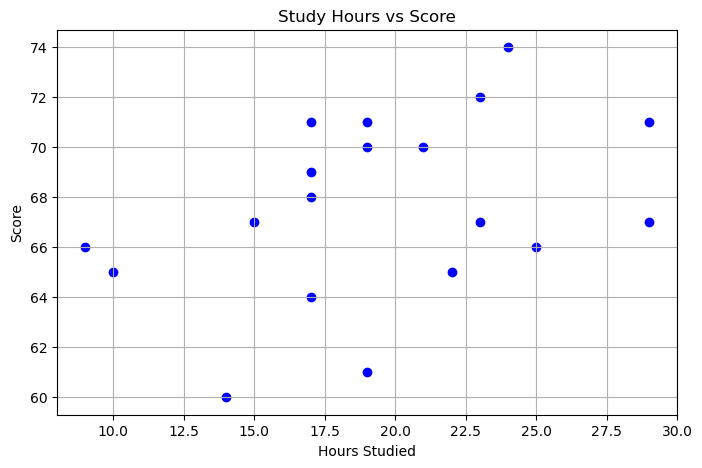

In [34]:
#visualize the relationship between study hours and exam scores
plt.figure(figsize=(8, 5))
plt.scatter(df['Hours_Studied'], df['Exam_Score'], color='blue')
plt.title('Study Hours vs Score')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.grid(True)
plt.show()


In [35]:
#sperates dataset into variables
X = df[["Hours_Studied"]]   # Features
y = df["Exam_Score"]    #Target

In [36]:
# Split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
#Train linear regression models
model = LinearRegression()
model.fit(X_train, y_train)
#Make predictions
y_pred = model.predict(X_test)

In [38]:
print("Slope (Coefficient):", model.coef_[0])
print("Intercept:", model.intercept_)

Slope (Coefficient): 0.2845092024539877
Intercept: 62.08052147239263


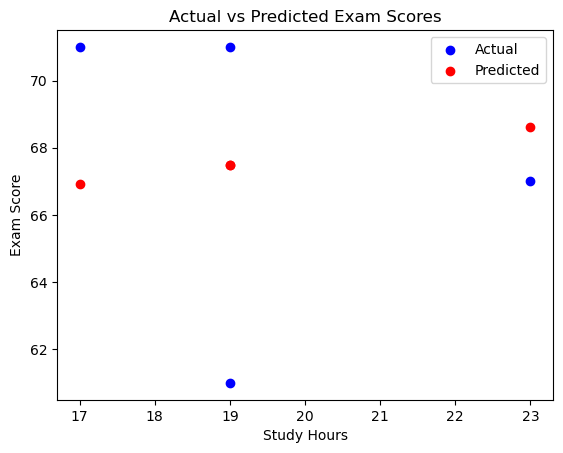

In [42]:
# Show actual vs predicted
plt.scatter(X_test, y_test, color="blue", label="Actual")
plt.scatter(X_test, y_pred, color="red", label="Predicted")
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.title("Actual vs Predicted Exam Scores")
plt.legend()
plt.show()

In [41]:
#Evaluate model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)
#show actual vs prediction
results = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(results)

Mean Absolute Error: 3.9267638036809807
Root Mean Squared Error: 4.293166909146395
R² Score: -0.10037505133072266
   Actual  Predicted
0      67  68.624233
1      71  67.486196
2      71  66.917178
3      61  67.486196


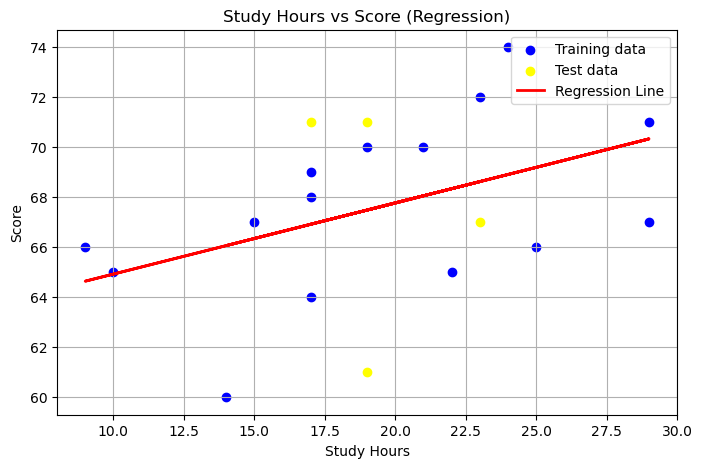

In [54]:
# Visualize regression line with training data
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='Yellow', label='Test data')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression Line')
plt.title('Study Hours vs Score (Regression)')
plt.xlabel('Study Hours')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Make a polynomial model (degree 2 = quadratic)
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())


poly_model.fit(X_train, y_train)

# Predict using polynomial model
y_poly_pred = poly_model.predict(X_test)

# Compare evaluation metrics
print("🔹 Polynomial Regression (Degree 2)")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_poly_pred):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_poly_pred):.2f}")
print(f"R-squared: {r2_score(y_test, y_poly_pred):.2f}")

🔹 Polynomial Regression (Degree 2)
Mean Squared Error: 18.62
Mean Absolute Error: 3.90
R-squared: -0.11


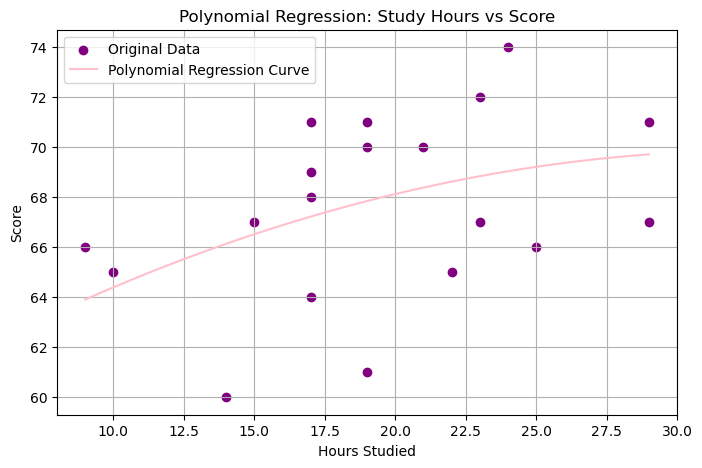

In [53]:
from sklearn.preprocessing import PolynomialFeatures
#create  a smooth curve for plotting
X_range = np.linspace(min(X['Hours_Studied']), max(X['Hours_Studied']), 100).reshape(-1, 1)
y_range_pred = poly_model.predict(X_range)

plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='purple', label='Original Data')
plt.plot(X_range, y_range_pred, color='pink', label='Polynomial Regression Curve')
plt.title('Polynomial Regression: Study Hours vs Score')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


In [57]:

data_extended = {
    'StudyHours': [10, 20, 30, 45, 50, 60, 70, 84, 89, 90],
    'SleepHours': [8, 7, 6, 6, 7, 5, 6, 7, 5, 5],
    'Participation': [2, 3, 5, 5, 4, 6, 7, 7, 8, 9],
    'Score': [50, 55, 65, 70, 65, 75, 85, 88, 95, 96]
}

df2 = pd.DataFrame(data_extended)
df2

     

,StudyHours,SleepHours,Participation,Score
0,10,8,2,50
1,20,7,3,55
2,30,6,5,65
3,45,6,5,70
4,50,7,4,65
5,60,5,6,75
6,70,6,7,85
7,84,7,7,88
8,89,5,8,95
9,90,5,9,96


In [59]:
# Features and target
X2 = df2[['StudyHours', 'SleepHours', 'Participation']]
y2 = df2['Score']

# Split dataset
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Train dataset
model2 = LinearRegression()
model2.fit(X2_train, y2_train)

# Prediction
y2_pred = model2.predict(X2_test)

# Evaluate model
print("🔹 Multi-Feature Linear Regression")
print(f"Mean Squared Error: {mean_squared_error(y2_test, y2_pred):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y2_test, y2_pred):.2f}")
print(f"R-squared: {r2_score(y2_test, y2_pred):.2f}")

🔹 Multi-Feature Linear Regression
Mean Squared Error: 8.12
Mean Absolute Error: 2.11
R-squared: 0.98
